<a href="https://colab.research.google.com/github/Stella-kimani/S.Kimani-Supervised-Learning-Naives-KNN/blob/master/Stella_Kimani_Independent_project_week_9_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Use Naive Bayes Classifier on the Spambase Dataset and determine if a message is marked a spam or not.

### b) Defining the Metric for Success

>The metric for success will be determined by a building model that is optimized with an accuracy that is above 80%

### c) Understanding the context

A spam is irrelevant or unsolicited messages sent over the Internet, typically to a large number of users, for the purposes of advertising, phishing, spreading malware

>The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### d) Recording the Experimental Design
The following steps wil be taken in this project:

Importing all necessary libraries and loading the dataset

Checking the dataset ie records,datatypes

Checking for missing values, outliers in the dataset

Conducting necessary data preparation and data cleaning procedures

Performing Exploratory Data Analysis and documenting the what i find 

Modelling using Naive Bayes Classifier

Optimizing the Naive Bayes model

Challenging the Solution

conclusion

Follow up questions


## 2. Reading the Data

In [1]:
#Load the necessary libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
from sklearn import model_selection, naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy import stats
from sklearn import metrics

In [2]:
# Loading the Data from the source
#
df = pd.read_csv('/content/spambase_csv.csv')




## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
df.shape

(4601, 58)

There are 4601 rows and 58 columns in the dataset

In [4]:
# Previewing the top of our dataset
#
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

It seems that i will not have to encode while working with these columns since am dealing with continuous data.

## 4. External Data Source Validation

This dataset is valid and is from UCI Machine learning reposiory, a  Center for Machine Learning and Intelligent Systems.

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
(b) Determine whether a given email is spam or not.
(c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.


. [Link](https://archive.ics.uci.edu/ml/datasets/spambase)

In [5]:
#Checking the columns in the dataset

df.columns#.values.tolist() 

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [8]:
#Checking duplicates
df.duplicated().sum()

391

In [5]:
#Dropping the duplicated values
df = df.drop_duplicates()

In [6]:
#Confirmation that duplicates have been dropped
df.duplicated().any()

False

In [8]:
#Check any unique values 
for column in df.columns:

  print("\n")
  print(column)
  print(df[column].unique())



word_freq_make
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


word_freq_address
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.800e-

## 5. Tidying the Dataset

There are no missing values in the dataset

In [12]:
# Identifying the Missing Data
#
df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [13]:
#check to see that datatype has changed.
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## 6. Exploratory Analysis

In [14]:
# Checking the statistical description of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4210.0,0.104366,0.300005,0.0,0.0000,0.000,0.00000,4.540
word_freq_address,4210.0,0.112656,0.454260,0.0,0.0000,0.000,0.00000,14.280
word_freq_all,4210.0,0.291473,0.515719,0.0,0.0000,0.000,0.44000,5.100
word_freq_3d,4210.0,0.063078,1.352487,0.0,0.0000,0.000,0.00000,42.810
word_freq_our,4210.0,0.325321,0.687805,0.0,0.0000,0.000,0.41000,10.000
word_freq_over,4210.0,0.096656,0.276030,0.0,0.0000,0.000,0.00000,5.880
word_freq_remove,4210.0,0.117475,0.397284,0.0,0.0000,0.000,0.00000,7.270
word_freq_internet,4210.0,0.108000,0.410282,0.0,0.0000,0.000,0.00000,11.110
word_freq_order,4210.0,0.091860,0.282144,0.0,0.0000,0.000,0.00000,5.260
word_freq_mail,4210.0,0.248420,0.656638,0.0,0.0000,0.000,0.19000,18.180


I have transposed this matrix so that i can a better view of the statistical summaries

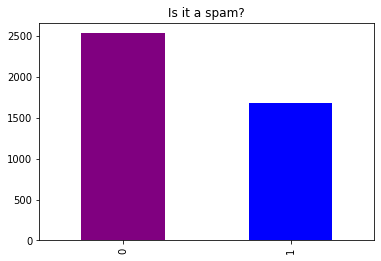

In [15]:
# Ploting the univariate summaries and recording our observations
#
count_Class=pd.value_counts(df["class"], sort= True)
count_Class.plot(kind= 'bar', color= ["purple", "blue"])
plt.title('Is it a spam?')
plt.show()

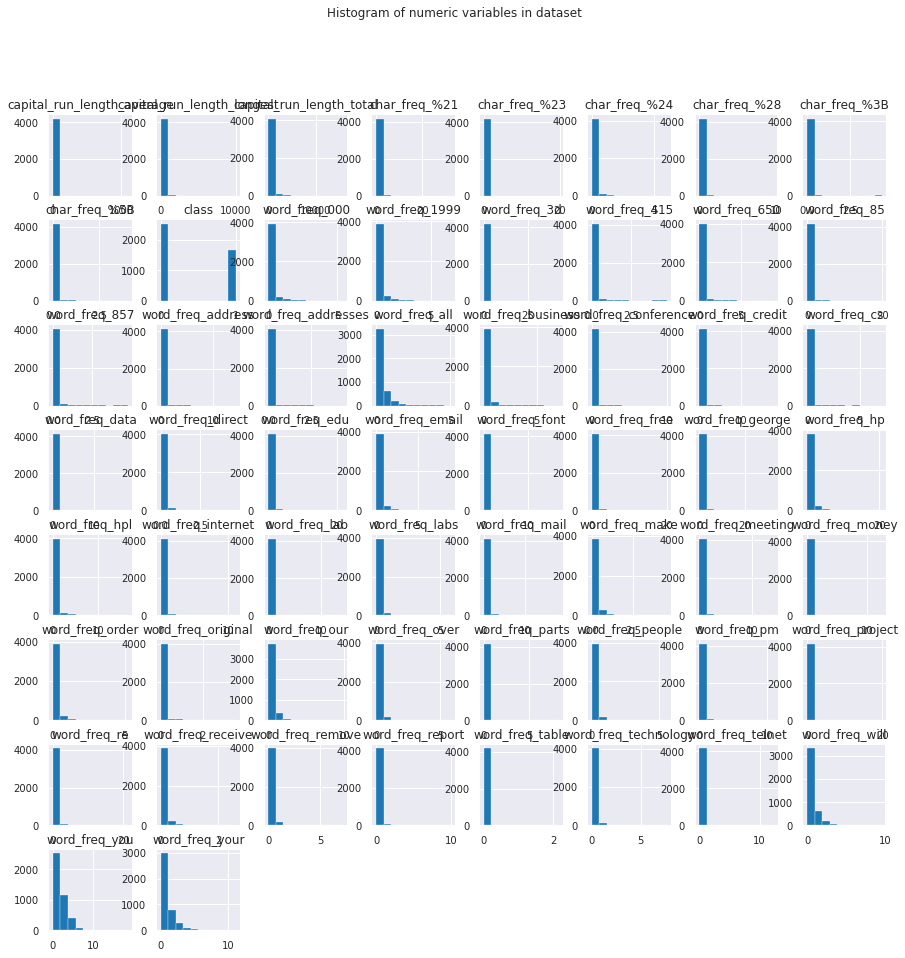

In [15]:
df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in dataset")
plt.savefig('Histogram')
plt.show()
plt.show()

From the above plots it seems some plots are positively skewed,this means there are outliers in the data.

#Bivariate Analysis

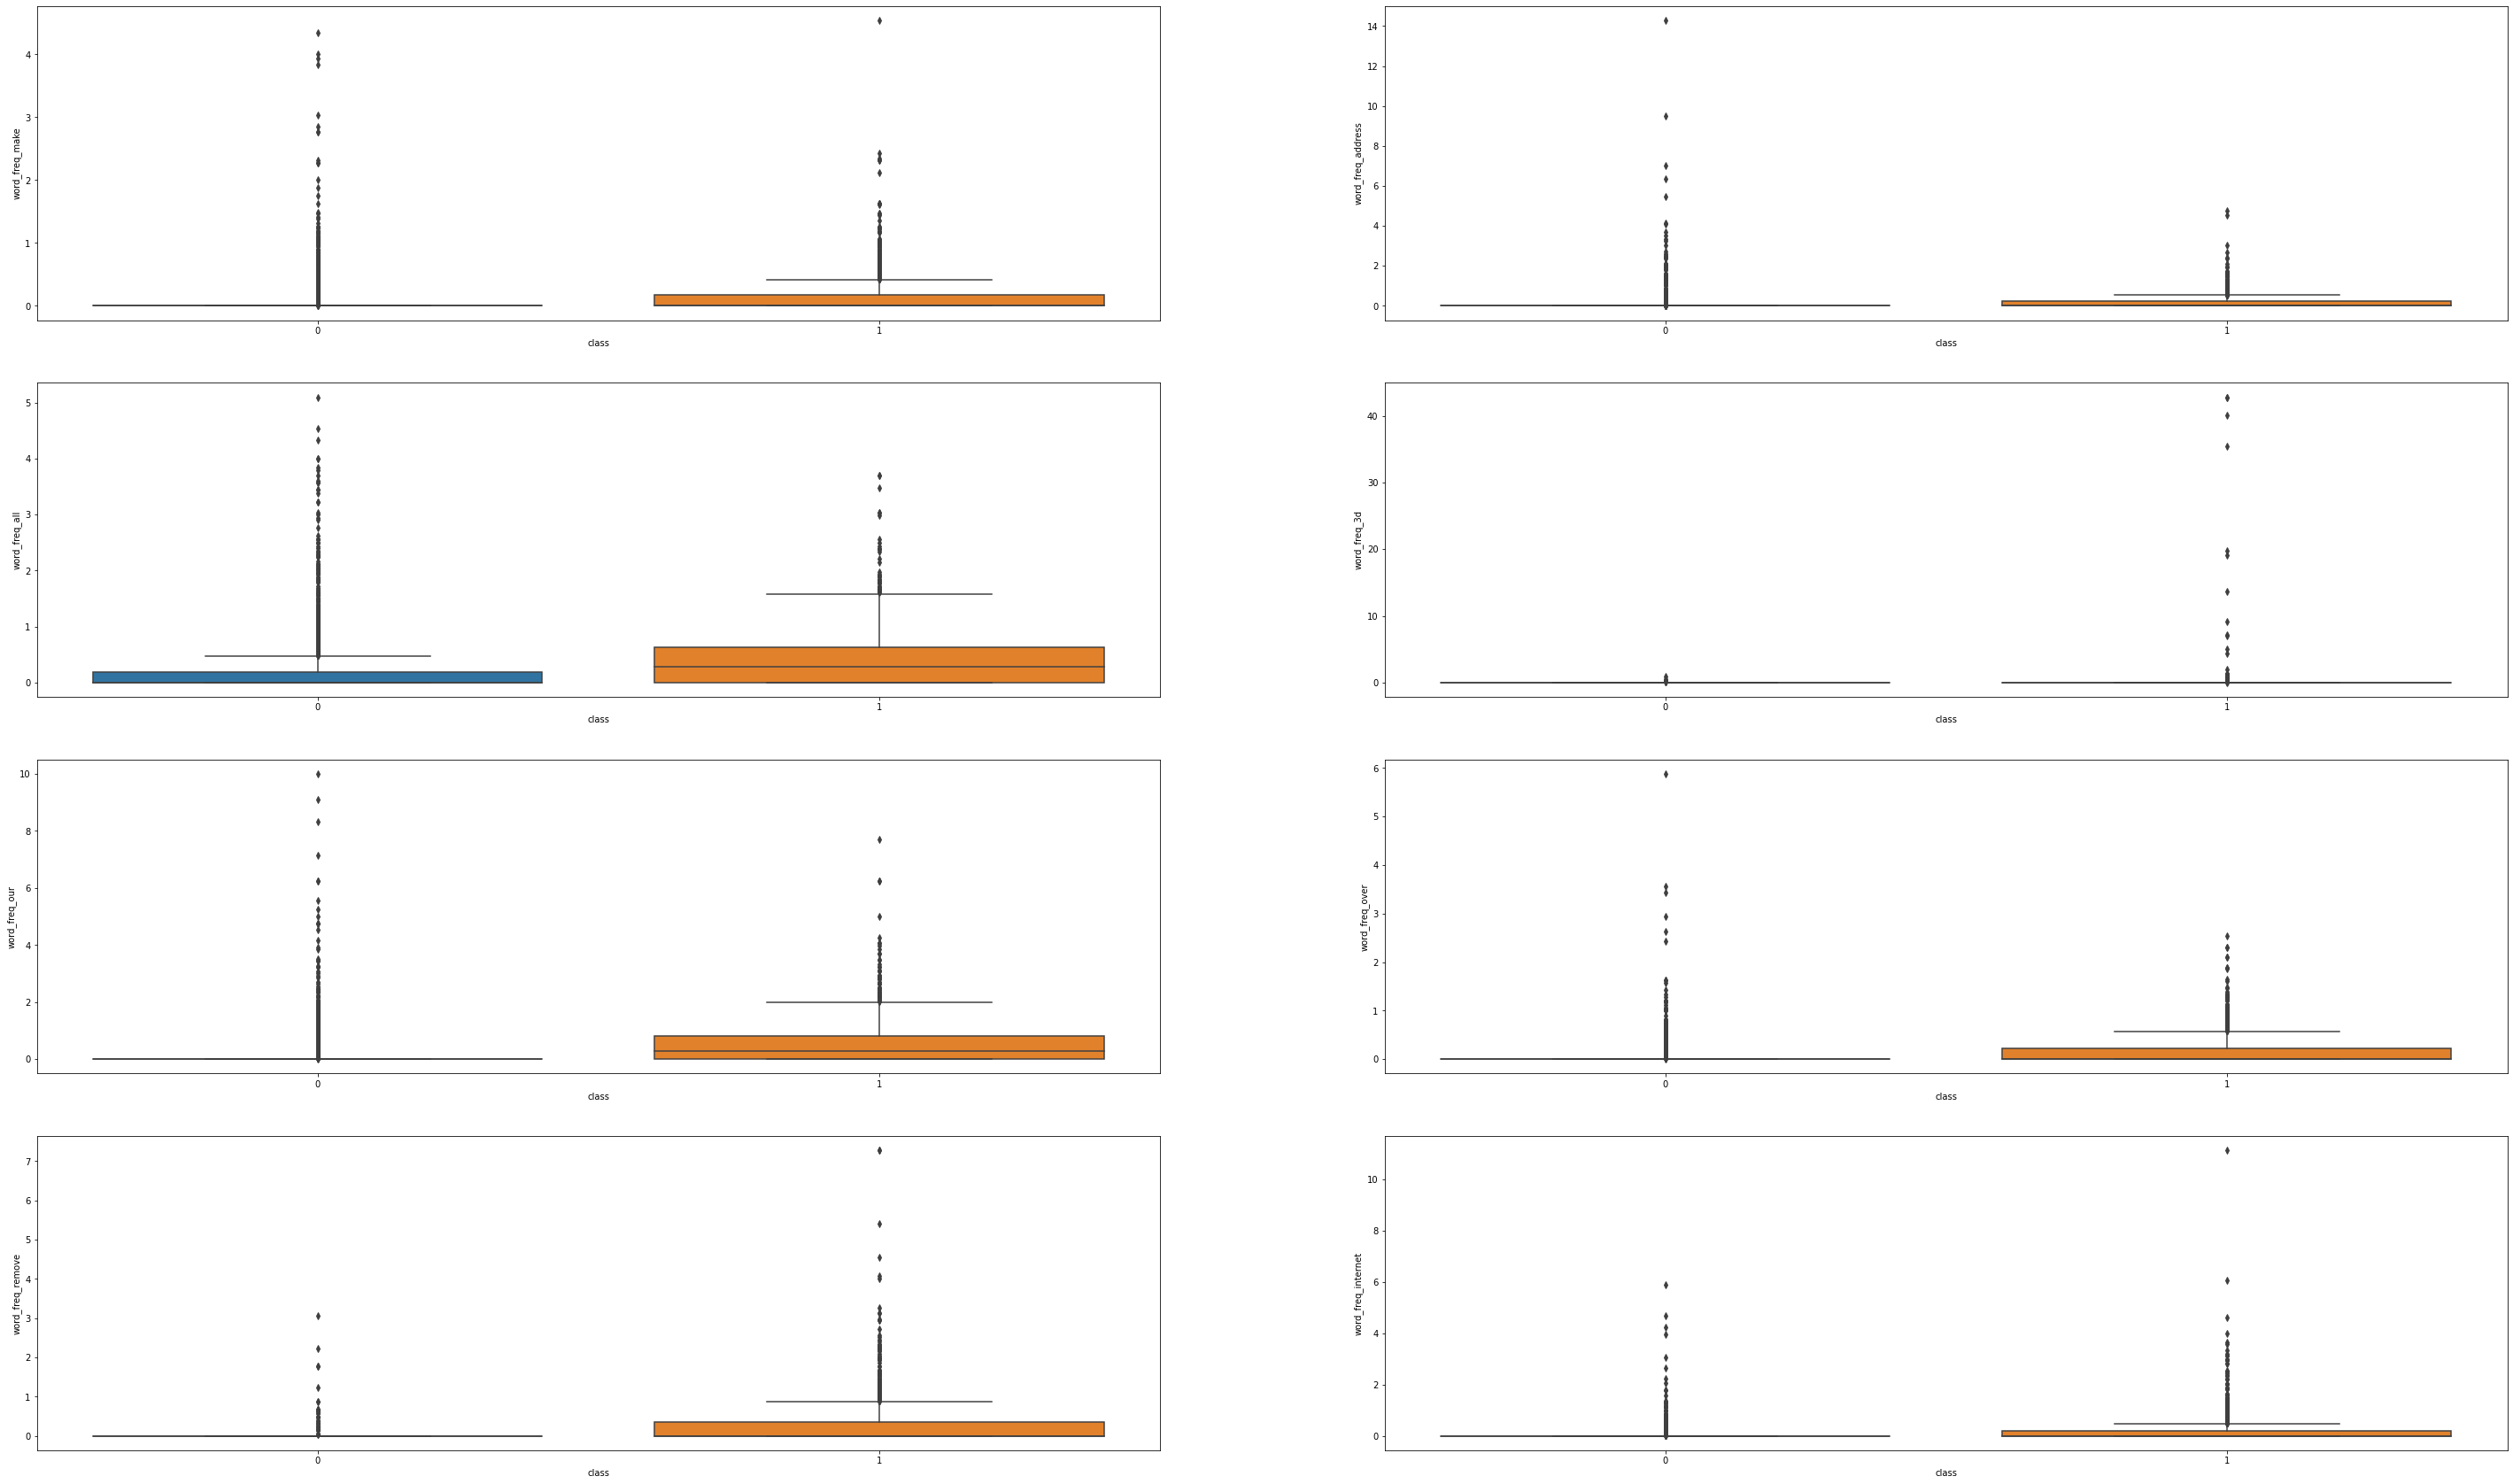

In [22]:
#This  relates the survived column with other independent variables.
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']

fig, ax = plt.subplots(4, 2, figsize=(50, 30))

for var, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x='class', y=var, data=df, ax=subplot)

The plots above shows the presence of outliers in various columns, and relates with the class column which shows whether an email is marked as spam or not.
The word frequency column with class plot shows that the frequency of a word has a higher chance of being marked as spam. This trend is noticed in other columns too.
As for outliers , i will not drop them as this is a predictive model

## 7. Implementing the Solution

In [23]:
#Base model
#Let me do a Naive Bayes classifier without optimization.
#I want to do an comparison pre-optimazation and after optimizing my model

n = np.where(df['class'] == 'class', 1, 0)

m = df[['class']].values

In [24]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

# fitting to our data
model = gauss.fit(m, n)

# making predictions
y_pred = model.predict(m)

# evaluating the algorithm
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(n, y_pred))

Accuracy: 1.0


This model is overfitted.Let me split the test sizes and see how the accuracy changes.

In [26]:
#Do a split with various test sizes
tests_size = [0.1, 0.2, 0.3, 0.4, 0.5]
for test in tests_size:
    m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = test, random_state = 69)
    # fitting to classifier
    gauss = GaussianNB()
    gauss.fit(m_train, n_train)
    
    # making predictions
    y_pred_m = gauss.predict(m_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(n_test, y_pred_m))
     


Test size 0.1 has accuracy score: 1.0
Test size 0.2 has accuracy score: 1.0
Test size 0.3 has accuracy score: 1.0
Test size 0.4 has accuracy score: 1.0
Test size 0.5 has accuracy score: 1.0


In [27]:

# splitting our dataset into independent and dependent

b = df['class']

test_features = df.columns.to_list()
test_features.remove('class')

a = df[test_features]

# Train using 80% of the data.
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1, random_state=69)

In [28]:
 #instantiating the classifier
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

# fitting to our data
model = gauss.fit(a_train, b_train)

# making predictions
y_pred_1 = model.predict(a_test)

# evaluating the algorithm
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(b_test, y_pred_1))

Accuracy: 0.8479809976247031


In [30]:
confusion_matrix = confusion_matrix(b_test, y_pred_1)
confusion_matrix

array([[184,  55],
       [  9, 173]])

In [34]:


from sklearn.model_selection import train_test_split 

for test in tests_size:
    a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = test, random_state = 69)
    
    
    # fitting to classifier
    gauss = GaussianNB()
    gauss.fit(a_train, b_train)
    
    # making a prediction
    y_pred = gauss.predict(a_test)

    # evaluating the model.
    print("test_size_split at {} has accuracy score:".format(test), accuracy_score(b_test, y_pred))

test_size_split at 0.2 has accuracy score: 0.8456057007125891
test_size_split at 0.3 has accuracy score: 0.8353127474267616
test_size_split at 0.4 has accuracy score: 0.8260095011876485
test_size_split at 0.5 has accuracy score: 0.8437054631828979


test size 0.1  has   0.8479809976247031 accuracy

test size 0.2  has 0.8456057007125891  accuracy

test size 0.3  has 0.835312474  accuracy

test size 0.4  has  0.8260095011876485  accuracy

test size 0.5  has  0.8437054631828979 accuracy

Test size 0.1 has the highest accuracy

#Optimization by Normalization

In [35]:

# splitting our dataset into dependent and independent variables

b = df['class'].values

test_features = df.columns.to_list()
test_features.remove('class')

a = df[test_features].values

In [36]:
# normalizing
from sklearn.preprocessing import Normalizer
normal = Normalizer()
a = normal.fit_transform(a)


In [85]:
gauss = GaussianNB()

# fitting to data
model = gauss.fit(a_train, b_train)

# making predictions
y_pred_normalized = model.predict(a_test)

# evaluating the algorithm
print("Accuracy:", accuracy_score(b_test, y_pred_normalized))

Accuracy: 0.8437054631828979


Compare to my models that have not been normalized, the accuracy is not changing.

#Normalizing with various test sizes.

In [ ]:
#Let me normalize then split into various test sizes 
y = df['class']

test_features = df.columns.to_list()
test_features.remove('class')

X = df[test_features]

In [41]:
# normalizing
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X = normal.fit_transform(X)


In [44]:
tests_size = [0.1, 0.2, 0.3, 0.4, 0.5]

from sklearn.model_selection import train_test_split 

for test in tests_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 69)
    
    # fitting to classifier
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    # making a prediction
    y_pred_new = gauss.predict(X_test)

    # evaluating the model.
    print("test_size_split at {} has accuracy score:".format(test), accuracy_score(y_test, y_pred_new))

test_size_split at 0.1 has accuracy score: 0.7814726840855107
test_size_split at 0.2 has accuracy score: 0.7636579572446556
test_size_split at 0.3 has accuracy score: 0.7648456057007126
test_size_split at 0.4 has accuracy score: 0.7737529691211401
test_size_split at 0.5 has accuracy score: 0.7866983372921615


Compared to models that has not been normalized, the accuracy of the normalized models  with various test split is lower than models with data not normalized.

#Let me optimize by removing highly correlated features

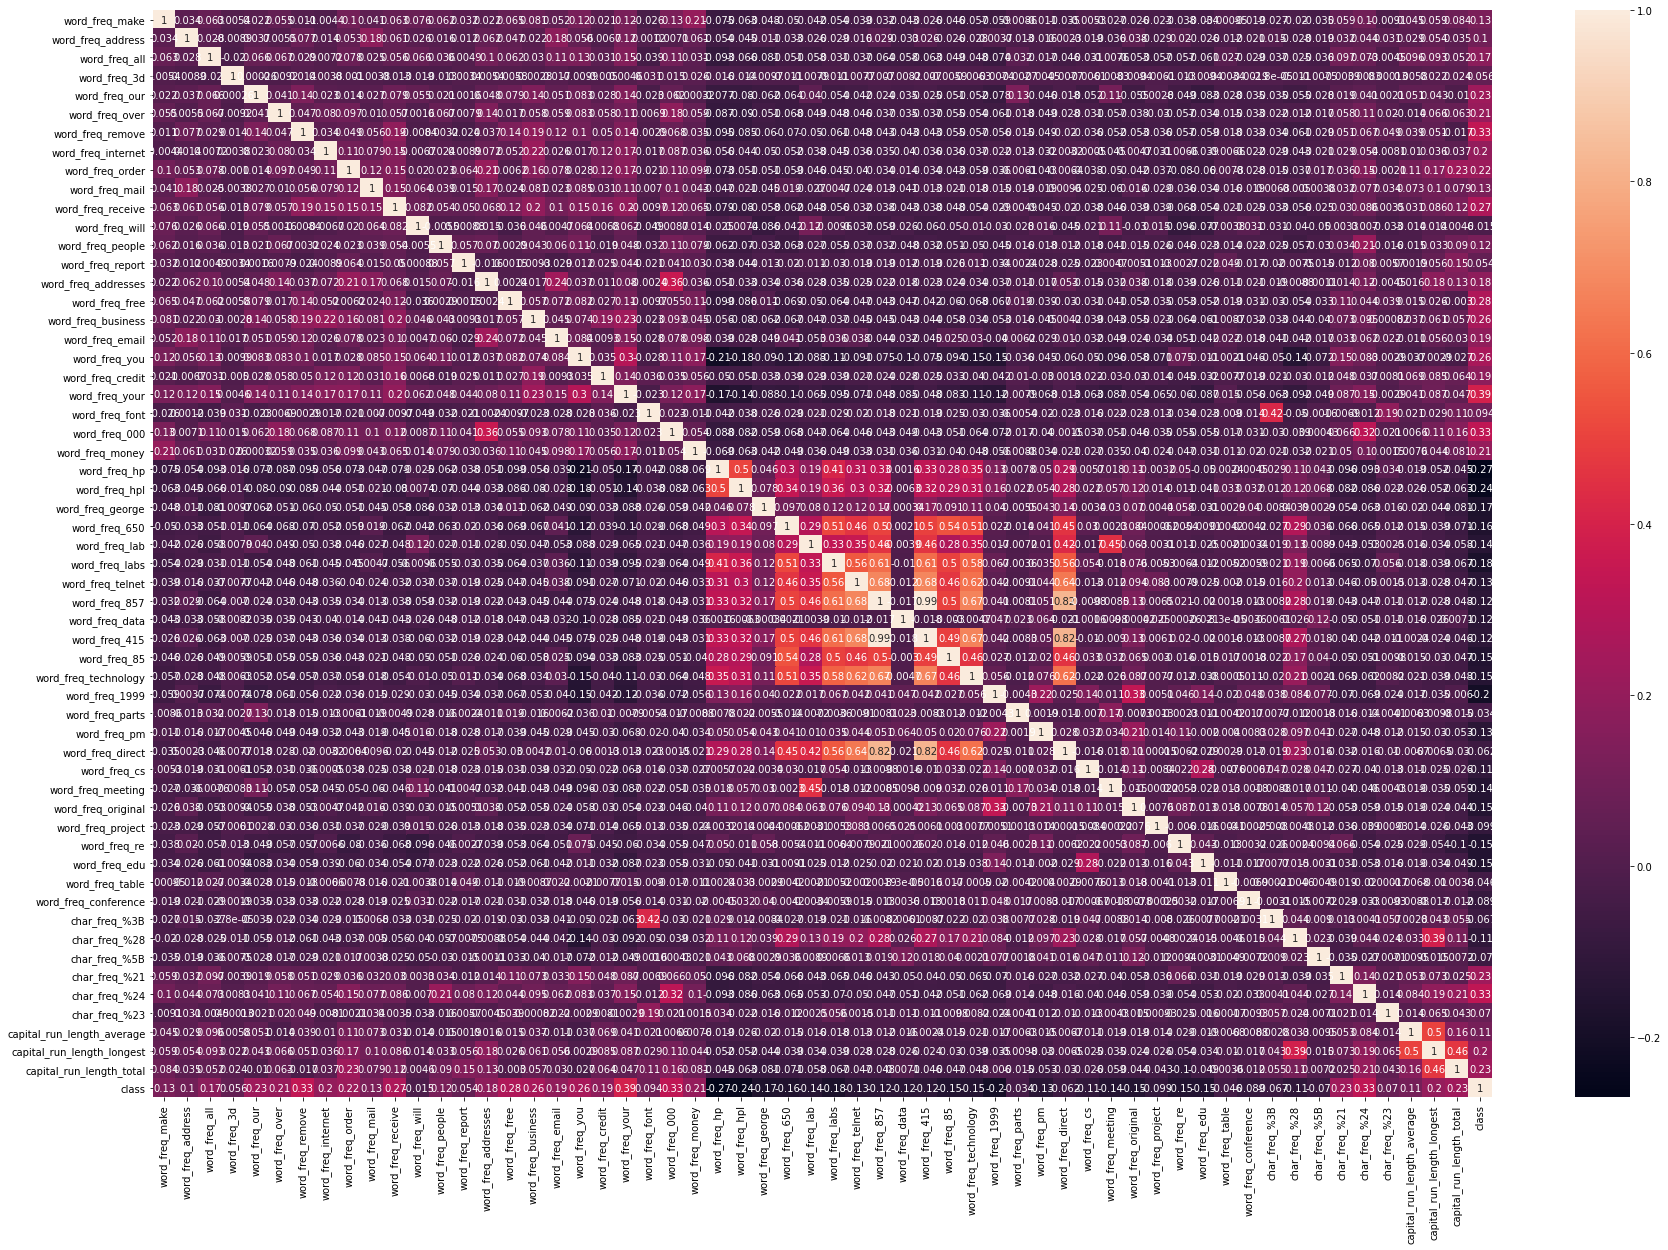

In [45]:
plt.figure(figsize=(30, 20))
correlation_=df.corr()

sns.heatmap(correlation_,annot=True)

This heatmap gives a view of how the variables relate to one another.Although it is very crowded,the correlation of the variables with each other is 1 meaning there is a perfect positive correlation.


In [46]:
correlation = df.corr()
correlation

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

Below is our VIF matrix heat map



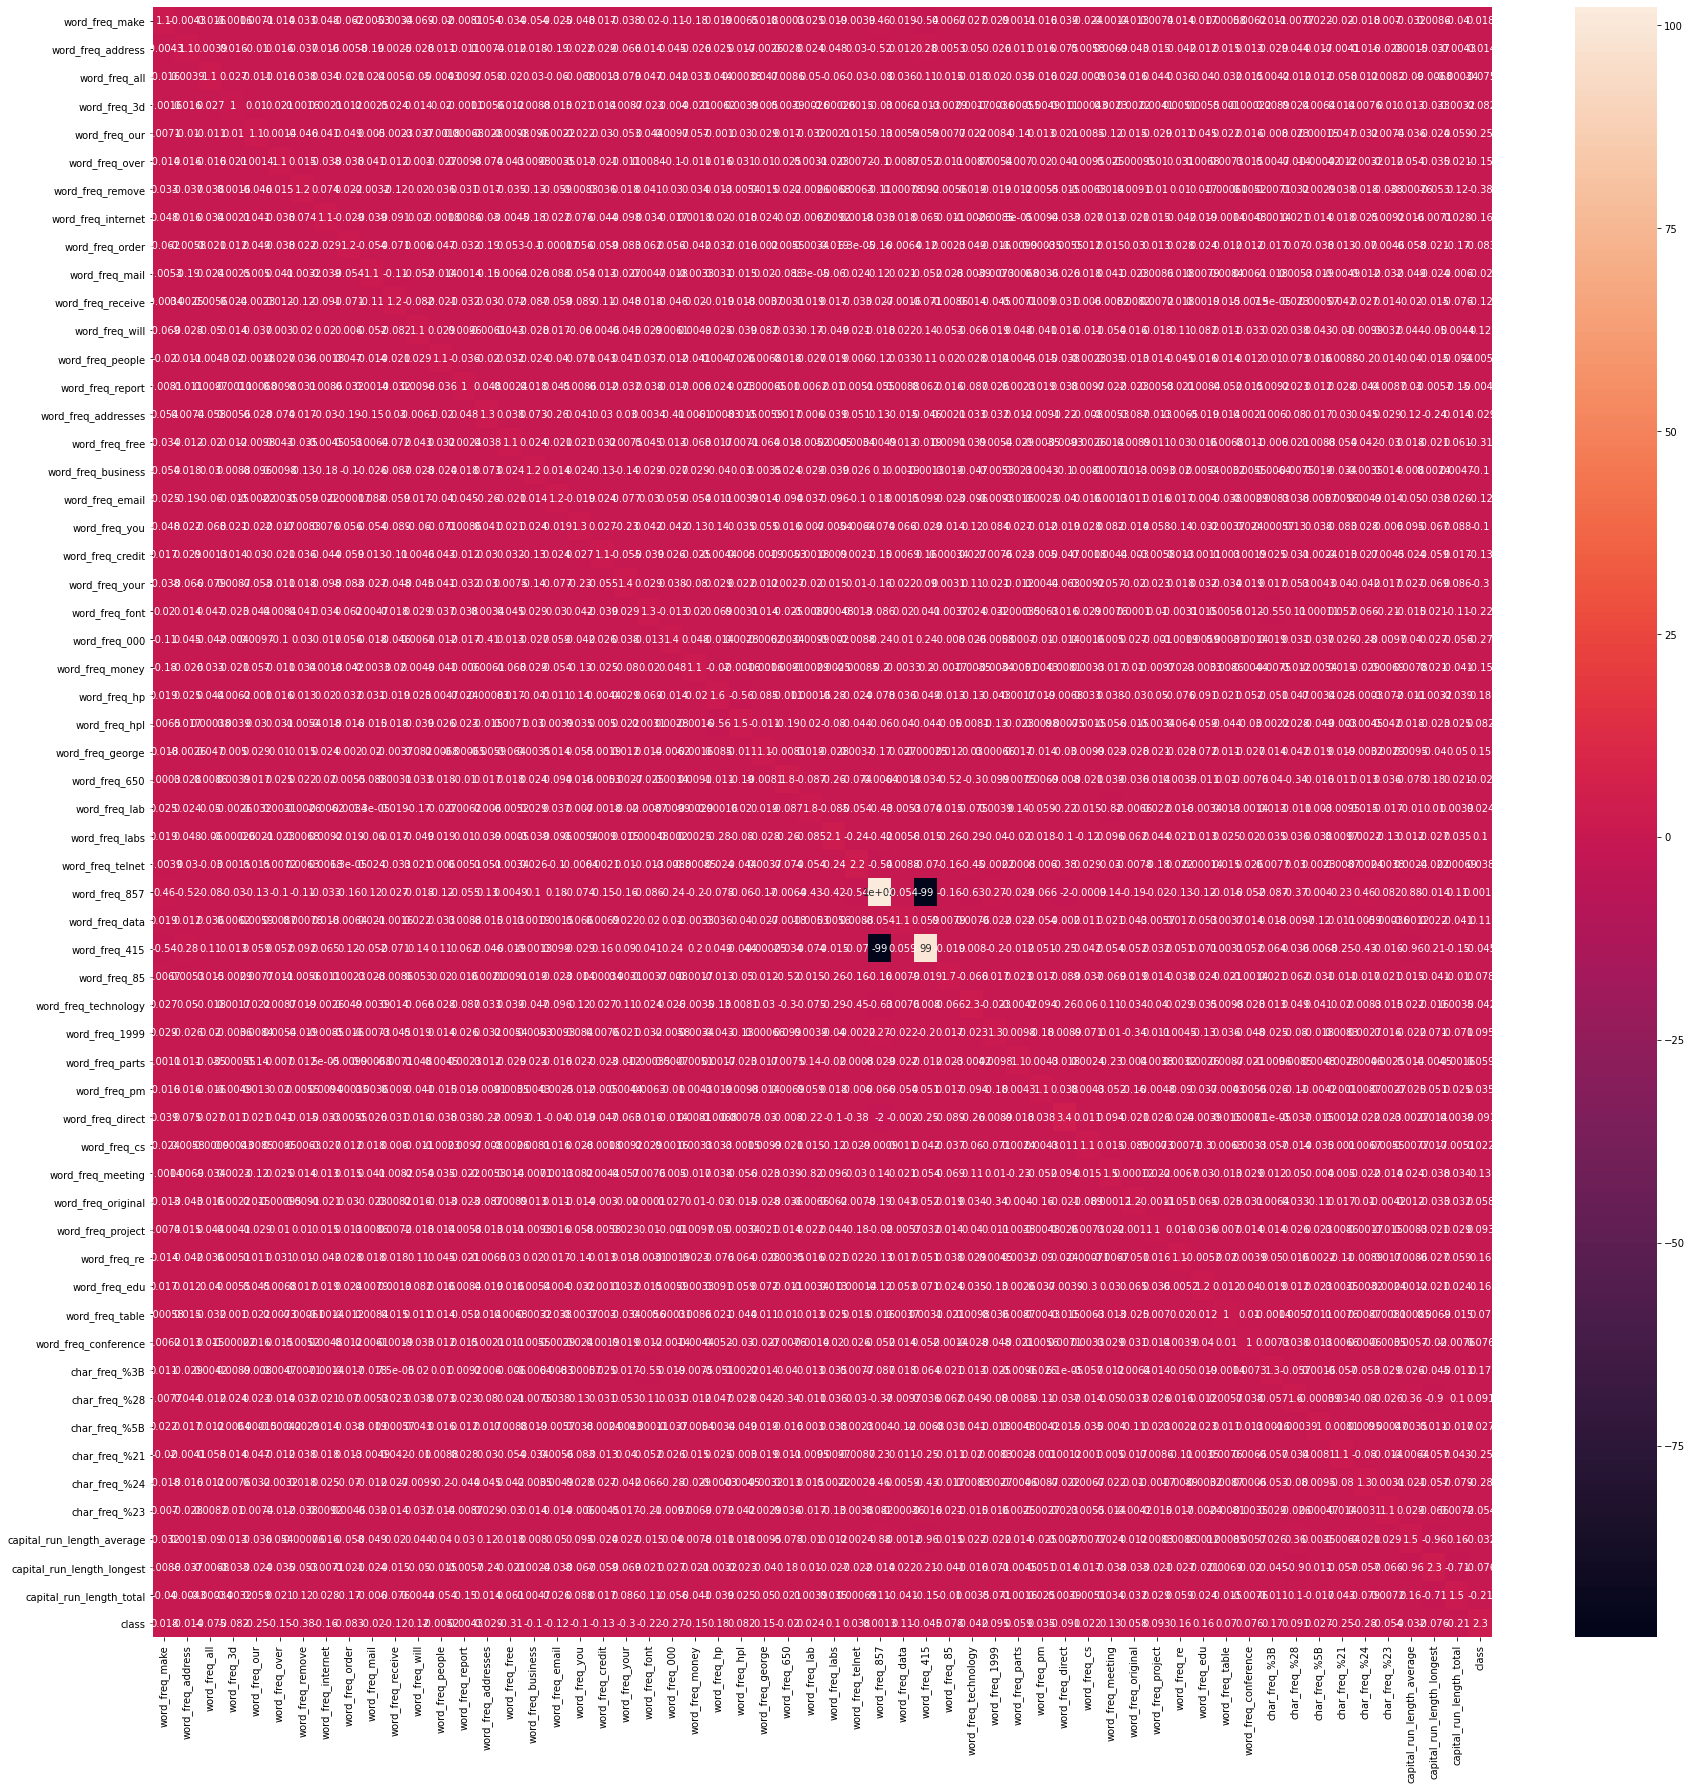

In [48]:
# Find the VIF matrix
print("Below is our VIF matrix heat map\n")
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF

# using a heatmap to display the results
plt.figure(figsize = (30, 30))
sns.heatmap(VIF, annot = True)

The variables word_freq_415 and word_freq_815 seem to have very high multicolinearity as seen from the heatmap, the darker the shade of color into a more deeper purple shows high multicolinearity.Therefore this 2 features  need to be dropped.

In [49]:
correlation_matrix = df.corr().abs()


 The abs() function is used to return the absolute value of a number. The abs() takes only one argument, a number whose absolute value is to be returned. The argument can be an integer, a floating point number or a complex number

In [50]:
#Let me check for highly correlated features.
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

In [51]:
#The 0.95 will be considered to have very high correlation and therefore dropped.
to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]

In [52]:
#Dropping marked features
df_2 =df.drop(df[to_drop], axis=1)


In [57]:
#Try modelling after the highly correlated features have been dropped
#This should improve the accuracy of the Naives Bayes classifier

# splitting our dataset into predictior and target variables
X = df_2.drop(columns = ['class'])
y = df_2['class']
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

# fitting to our data
model = gauss.fit(X, y)

# making predictions
y_pred = model.predict(X)

# evaluating the algorithm
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8320665083135392


In [ ]:
X= df_2.drop(columns = ['class']).values
y = df_2['class'].values

for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X,y, test_size = test, random_state = 69)
    
    # fitting to classifier
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    # making predictions
    y_pred = gauss.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.850356294536817
Test size 0.2 has accuracy score: 0.8491686460807601
Test size 0.3 has accuracy score: 0.8376880443388757
Test size 0.4 has accuracy score: 0.830166270783848
Test size 0.5 has accuracy score: 0.8479809976247031


The best optimization will be achieved by removing highly correlated features.The accuracy of the models given various test splits is higher than models where highly correlated features have not been dropped.

## 8. Challenging the solution

> Let me try modelling with a different classifier.


#SVM Classifier






In [59]:
# Reviewing the Solution 
#

y = df['class']

test_features = df.columns.to_list()
test_features.remove('class')

X = df[test_features]

# Train using 80% of the data.#This is a 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

In [71]:
# create and load our models
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# list of models
svm_models = [poly, linear, rbf]

model_names = ['Polynomial', 'Linear', 'rbf']

# function
def predictor(svm_models, X, y):
  # get training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
  # standardize our data 
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  

  svm_models.fit(X_train, y_train)
  y_pred = svm_models.predict(X_test)
  
  accurate_score = accuracy_score(y_test, y_pred)

  return  accurate_score, svm_models


In [72]:
# print the scores
for svm_models, name in zip(svm_models, model_names):
  # we use the function above and the loop to get us the accuracy scores for each model.
  print(f'The accuracy score of {name:<10} is: {predictor(svm_models, X, y)[0]}')

The accuracy score of Polynomial is: 0.7589073634204275
The accuracy score of Linear     is: 0.9275534441805225
The accuracy score of rbf        is: 0.9251781472684085


The Linear kernel model outperforms the other Kernel models and SVM classifier outperforms the Naive Bayes classifier in terms of accuracy of the model.
The polynomial model performs poorly and the accuracy is less than the Naive bayes classifier models, either optimized or not.

#9.Conclusion

I observed that majority of the emails were not marked as spam.

In the models the best performing model using Naive Bayes Classifier,are the models that have been optimized by dropping the highly correlated features.

I challenged the solution by using SVM Classifier,which outperformed the models that  used Naive Bayes classifier.
The accuracy of the linear model kernel was the highest of all the SVM models then closely followed by RBF Kernel model.

The overall accuracy of this models can be increased by modelling with top important features only.

According to the metric of success that i set, i would say the model accuracy is not far off from my 80% threshold that i had set.
The SVM models not including the polynomial model, surpassed my metric for success.

## 9. Follow up questions

### a). Did we have the right data?

My conclusion shows that i had the right data however since this is more of text classification, should multinomial classifier be used instead of the Gaussian Classifier.
Although the Gaussian classifier is very appropriate for continuous  datatypes.